## Reading and visualizing multiple images

This basic tutorial covers how to read images stored multiple folders. **tsraster** stacks these images and renders one image with multiple bands.

In [1]:
import os.path

import matplotlib.pyplot as plt
%matplotlib inline

import tsraster
from tsraster.prep import sRead as tr

connect to the data directory

In [2]:
path = r"C:/Users/mmann/Documents/ts-raster-example-data/2year/"

the images in this directory are structured as: 
    - temperature:
        2005
          tmx-200501.tif
          tmx-200502.tif
          tmx-200503.tif
        2006
          tmx-200601.tif
          tmx-200602.tif
          tmx-200603.tif
        2007
          tmx-200701.tif
          tmx-200702.tif
          tmx-200703.tif
 

Accordingly, for temprature we have three years of data and for each year we have three monthly data. 

    'tmx-200501.tif': temprature (the variable), 2005 (the year), 01 (the month)


Read the images and print their corresponding name

In [ ]:
image_name = tr.image_names(path)
print(image_name)

Convert each to array and stack them as bands

In [ ]:
rasters = tr.image2array(path)

In [ ]:
# first image
rasters[0]

Check the total number of images (bands stacked together)

In [ ]:
rasters.shape

Visualize

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(10,10))

for i in range(0,rasters.shape[2]):
    img = rasters[:,:,i]
    i = i+1
    plt.subplot(3,3,i)
    plt.imshow(img, cmap="Greys")
    

In [ ]:
# clean up
del rasters
import gc
gc.collect()

# Feature extraction


This documents show how to extract important timeseries charcterstics from raster files.

In [3]:
import os.path

import matplotlib.pyplot as plt
%matplotlib inline

from rasterio.plot import show

import tsraster
from tsraster.prep import sRead as tr

from tsraster.calculate import calculateFeatures
from tsraster.calculate import features2array

connect to the data directory

In [6]:
path = r"C:/Users/mmann/Documents/ts-raster-example-data/2year/"

read the images and convert the arrays to a time-series dataframe 

In [7]:
rasters = tr.ts_series(path)

Lets take a look at the time-series data

In [8]:
rasters.head(10)

,id,kind,value,time
0,1,aet-198401,0.0,198401
1,1,aet-198402,0.0,198402
2,1,aet-198403,0.0,198403
3,1,aet-198404,0.0,198404
4,1,aet-198405,0.0,198405
5,1,aet-198406,0.0,198406
6,1,aet-198407,0.0,198407
7,1,aet-198408,0.0,198408
8,1,aet-198409,0.0,198409
9,1,aet-198410,0.0,198410


Accordingly, each pixel is identified by *id*. Since there are 9 bands (3 images per year), **tsraster** assigns each 9 first pixels the id number 1 and differentiate each by their respective year and month. Hence, the *time* column organizes and orders pixels by time. The *value* column represent the pixel value

We can summerize the data and examine its pattern.

In [9]:
rasters.describe()

,value
count,2.730406e+07
mean,9.136765e+00
std,2.126251e+01
min,-1.000000e-02
25%,0.000000e+00
50%,0.000000e+00
75%,4.487500e+00
max,1.945075e+02


Let's go ahead and extract features

In [10]:
import os.path

import matplotlib.pyplot as plt
%matplotlib inline

from rasterio.plot import show

import tsraster
from tsraster.prep import sRead as tr

from tsraster.calculate import calculateFeatures
from tsraster.calculate import features2array

path = r"C:\Users\mmann\Documents\ts-raster-example-data\2year"

extract features


In [11]:
ts_features = calculateFeatures(path,reset_df=True)

C:\Users\mmann\Documents\ts-raster-example-data\2year\my_df.pkl


Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 50/50 [11:14<00:00,  3.00s/it]


The feature extraction swift through all bands and calculate values such maximum, minimum and mean, median. 
In this instance, 4 features of temprature data are generated for 9 rasters representing 3 months of 3 years of data.

Let's take a look at the summary of these features.

In [12]:
ts_features.describe()

variable,"value__agg_linear_trend__f_agg_""max""__chunk_len_6__attr_""slope""","value__agg_linear_trend__f_agg_""min""__chunk_len_6__attr_""slope""",value__last_location_of_maximum,value__last_location_of_minimum,value__longest_strike_above_mean,value__longest_strike_below_mean,value__maximum,value__mean,value__mean_abs_change,value__mean_change,...,value__number_cwt_peaks__n_12,value__number_cwt_peaks__n_6,value__quantile__q_0.05,value__quantile__q_0.15,value__quantile__q_0.85,value__quantile__q_0.95,value__ratio_beyond_r_sigma__r_2,value__ratio_beyond_r_sigma__r_3,value__skewness,value__sum_values
count,1.137669e+06,1.137669e+06,1.137669e+06,1.137669e+06,1.137669e+06,1.137669e+06,1.137669e+06,1.137669e+06,1.137669e+06,1.137669e+06,...,1.137669e+06,1.137669e+06,1.137669e+06,1.137669e+06,1.137669e+06,1.137669e+06,1.137669e+06,1.137669e+06,1.137669e+06,1.137669e+06
mean,-9.661236e-01,-2.851645e-01,7.654705e-01,8.746603e-01,1.541722e+01,1.649159e+01,3.531019e+01,9.136761e+00,7.780789e+00,1.820007e-02,...,1.364370e+00,1.617892e+00,1.742146e-01,5.504904e-01,2.014164e+01,2.833287e+01,2.445519e-02,3.580311e-03,5.517891e-01,2.192823e+02
std,6.494044e+00,1.094308e+00,3.185040e-01,2.407689e-01,1.003047e+01,8.810522e+00,4.682504e+01,1.279547e+01,1.024846e+01,2.397943e-01,...,1.729038e+00,2.039654e+00,8.426926e-01,1.842471e+00,2.781575e+01,3.833924e+01,3.393963e-02,1.168495e-02,7.316594e-01,3.070914e+02
min,-4.720590e+01,-1.253110e+01,4.166667e-02,4.166667e-02,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.918283e+00,...,0.000000e+00,0.000000e+00,-1.000000e-02,-1.600000e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.740087e-02,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e-01,8.333333e-01,4.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.400000e+01,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.400000e+01,2.400000e+01,6.900800e+01,1.719428e+01,1.491031e+01,0.000000e+00,...,3.000000e+00,4.000000e+00,0.000000e+00,5.912000e-02,3.934994e+01,5.253483e+01,4.166667e-02,0.000000e+00,1.117674e+00,4.126628e+02
max,3.787300e+01,6.453188e+00,1.000000e+00,1.000000e+00,2.400000e+01,2.400000e+01,1.945075e+02,7.534869e+01,4.279697e+01,2.674261e+00,...,9.000000e+00,9.000000e+00,1.913350e+01,2.404850e+01,1.522885e+02,1.826650e+02,1.666667e-01,8.333333e-02,4.044970e+00,1.808369e+03


Next, convert these features to array, visualize or create a tiff

In [13]:
# first, get the original dimension/shape of image 
og_rasters = tr.image2array(path)
rows, cols, nums = og_rasters.shape


# convert df to matrix array
matrix_features = ts_features.values
num_of_layers = matrix_features.shape[1]


f2Array = matrix_features.reshape(rows, cols, num_of_layers)
print(f2Array.shape)


(1209, 941, 22)


visualize features

ValueError: num must be 1 <= num <= 4, not 5

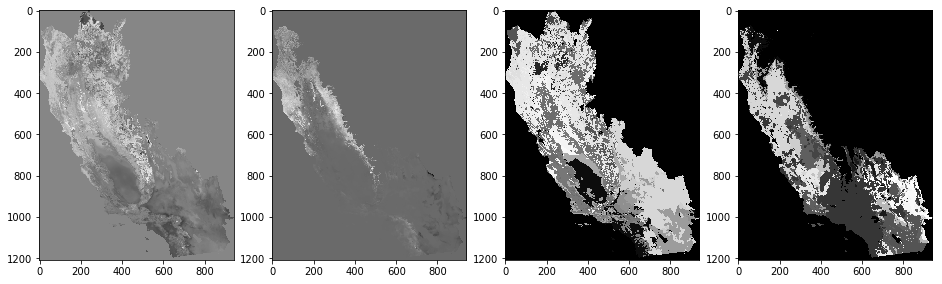

In [17]:
fig, ax = plt.subplots(3, 3,figsize=(16,10))

for i in range(0,f2Array.shape[2]):
    img = f2Array[:,:,i]
    i = i+1
    plt.subplot(1,4,i)
    plt.imshow(img, cmap="Greys")